In [1]:
import numpy as np
from numpy import exp, sqrt
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

Построить алгоритм метода пристрелки для вычисления решения следующей нелинейной задачи:

$$
\begin{cases}
    y'' = x \sqrt{y}\\
    y(0) = 0,\ \int^1_0y(x)dx=1
\end{cases}
$$

---

 ### 1 Краткое описание метода

Решаем задачу:

$$
\begin{cases}
    y'' = x \sqrt{y}\\
    y(0) = 0,\ y'(0) = \alpha
\end{cases}
$$

Тогда для нашего соотношения:

$$
\int^1_0y(x)dx=\beta
$$

Запишем разностную схему:

$$
\begin{cases}
    u' = v\\
    v' = x \sqrt{u}
\end{cases}
$$

### 2 Точное решение

In [2]:
h = 1e-6
x = np.arange(0, 1+h, h)

def fun(z, x):
    u, v = z
    return np.array([v, x*sqrt(u)])

exSol = odeint(fun, [0, 1], x)[..., 0]

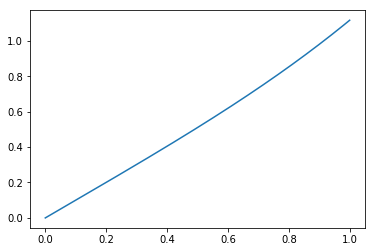

In [3]:
plt.plot(x, exSol)

### 3 Реализация

In [4]:
def explicit(f, y0, interval, h):
    y = [y0]
    u = [y0[0]]
    v = [y0[1]]
    x = [interval[0]]
    
    while x[-1] + h < interval[-1]:
        f_1 = f(y[-1], x[-1])
        f_2 = f(y[-1]+h*f_1, x[-1]+h)
        y_next = y[-1]+h/2*(f_1+f_2)
        y.append(y_next)
        u.append(y_next[0])
        v.append(y_next[1])
        x.append(x[-1]+h)
        
    return y, u, v, x

В качестве примера рассмотрим

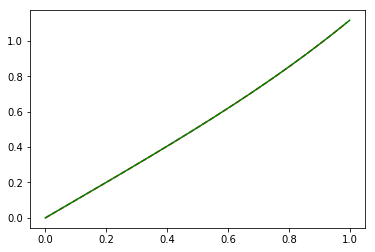

In [5]:
 _, resRK_u, _, resRK_x = explicit(f=fun, y0=[0, 1], interval=[0, 1], h=1e-2)

plt.plot(resRK_x, resRK_u, 'r', ls='--')
plt.plot(x, exSol, 'g', ls='-')

### 4 Порядок сходимости

In [6]:
 _, resRK_u_double, _, _ = explicit(f=fun, y0=[0, 1], interval=[0, 1], h=0.5*1e-2)

In [7]:
diff = [0]*2
diff[0] = abs(resRK_u - exSol[0:-1:10000])
diff[1] = abs(resRK_u_double - exSol[0:-1:5000])

print('Шаг: ', 1e-2,     '\t Ошибка', max(diff[0]), '\t Err/h^2: ', max(diff[0])/(1e-2)**2)
print('Шаг: ', 0.5*1e-2, '\t Ошибка', max(diff[1]), '\t Err/h^2: ', max(diff[1])/(0.5*1e-2)**2)

Шаг:  0.01 	 Ошибка 1.0328771260947889e-05 	 Err/h^2:  0.10328771260947889
Шаг:  0.005 	 Ошибка 2.65176571945247e-06 	 Err/h^2:  0.10607062877809881


In [8]:
1.0328771260947889e-05/2.65176571945247e-06

3.8950542218641195

### 5 Решение задачи

Проверим непрерывность

In [8]:
initDerivative = np.linspace(1e-8, 10, 15)
bucket = [0] * len(initDerivative)
x      = [0] * len(initDerivative)

for i in range(len(initDerivative)):
     _, bucket[i], _, x[i] = explicit(f=fun, y0=[0, initDerivative[i]], interval=[0, 1], h=1e-2)

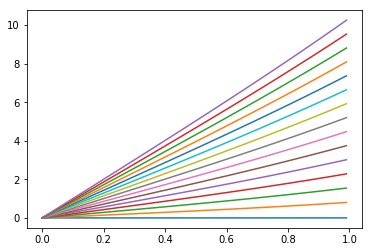

In [9]:
for i in range(len(initDerivative)):
    plt.plot(x[i], bucket[i])

Получили задачу маломерной оптимизации

In [35]:
def lossFunction(fun, h):
    
    def inner(alpha):
        _, y, _, x = explicit(f=fun, y0=[0, alpha], interval=[0, 1], h=h)
        I = 0.5*h*y[0]+0.5*h*y[-1]
        for i in range(1, len(x)-1):
            I += h*y[i]
        return I
    
    return inner

In [36]:
def returnMidPoint (a, b):
    return (a + b) / 2.

# ai - левая граница отрезка на i-ом шаге
# bi - правая граница отрезка на i-ом шаге
# сi - середина отрезка [ai;bi]
# yi - середина отрезка [ai;ci]
# zi - середина отрезка [ci;bi]
# fxi - f(xi)
# [   |   |   |   ]
# a   y   c   z   b
def dichotomy(f, a, b, epsilon):
    c = returnMidPoint(a, b)
    
    while abs(b - a) > epsilon:
        y = returnMidPoint(a, c)
        if f(c) >= 1:
            # a не изменяется
            b = c
            c = y
        else:
            z = returnMidPoint(b, c)
            a = c
            # b не изменяется
            c = z
    return c

In [37]:
alpha = dichotomy(f=lossFunction(fun=fun, h=1e-2), a=0, b=200, epsilon=1e-3)

Таким образом:

In [44]:
print(alpha)

1.9702911376953125


In [45]:
_, yy, _, xx = explicit(f=fun, y0=[0, alpha], interval=[0, 1], h=1e-2)

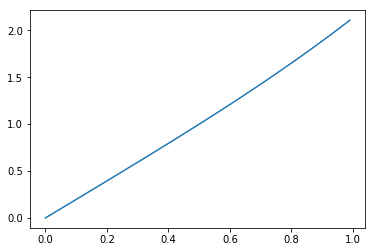

In [46]:
plt.plot(xx, yy)

In [48]:
h=1e-2
I = 0.5*h*yy[0]+0.5*h*yy[-1]
for i in range(1, len(xx)-1):
        I += h*yy[i]
        
print(I)

0.9998660634556005
